In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].isnull().sum()

0

In [5]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [6]:
yes_no = {
    "Yes": True,
    "No": False
}
long_cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
'Do you consider yourself to be a fan of the Star Wars film franchise?' ]
star_wars[long_cols[0]] = star_wars[long_cols[0]].map(yes_no)
star_wars[long_cols[1]] = star_wars[long_cols[1]].map(yes_no)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [7]:
weird_cols = star_wars.columns[3:9].tolist()
for col in range(6):
    print(star_wars[weird_cols[col]].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


In [8]:
import numpy as np
seen_movie_map = {"Star Wars: Episode I  The Phantom Menace": True,
                  'Star Wars: Episode II  Attack of the Clones': True,
                  'Star Wars: Episode III  Revenge of the Sith': True,
                  'Star Wars: Episode IV  A New Hope':True,
                  'Star Wars: Episode V The Empire Strikes Back':True,
                  'Star Wars: Episode VI Return of the Jedi':True,
                  np.NaN: False}
for col in range(6):
    star_wars[weird_cols[col]] = star_wars[weird_cols[col]].map(seen_movie_map)
rename_map = dict(zip(weird_cols, ['seen_{}'.format(i) for i in range(1,7)]))
star_wars.rename(columns= rename_map, inplace = True)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
new_rename_map = dict(zip(star_wars.columns[9:15], ['ranking_{}'.format(i) for i in range(1,7)]))
star_wars.rename(columns = new_rename_map, inplace=True)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

<Container object of 6 artists>

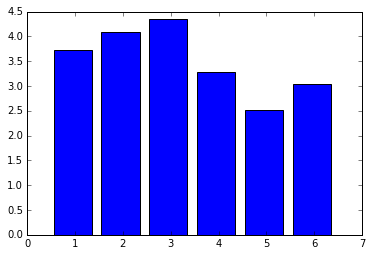

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.bar([i - 0.45 for i in range(1,7)], star_wars[star_wars.columns[9:15]].mean())

The older movies have a better rank, as expected

<Container object of 6 artists>

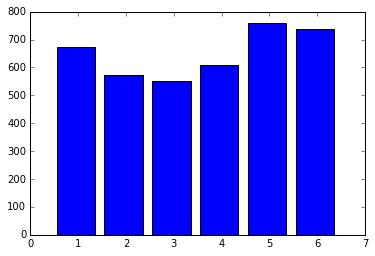

In [17]:
fig, ax = plt.subplots()
ax.bar([i - 0.45 for i in range(1,7)], star_wars[star_wars.columns[3:9]].sum())

The last two movies have been seen by fewer people, which might explain their lower ranking

In [20]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
sw_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']== True]
sw_non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]
st_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']== 'Yes']
st_non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']== 'No']

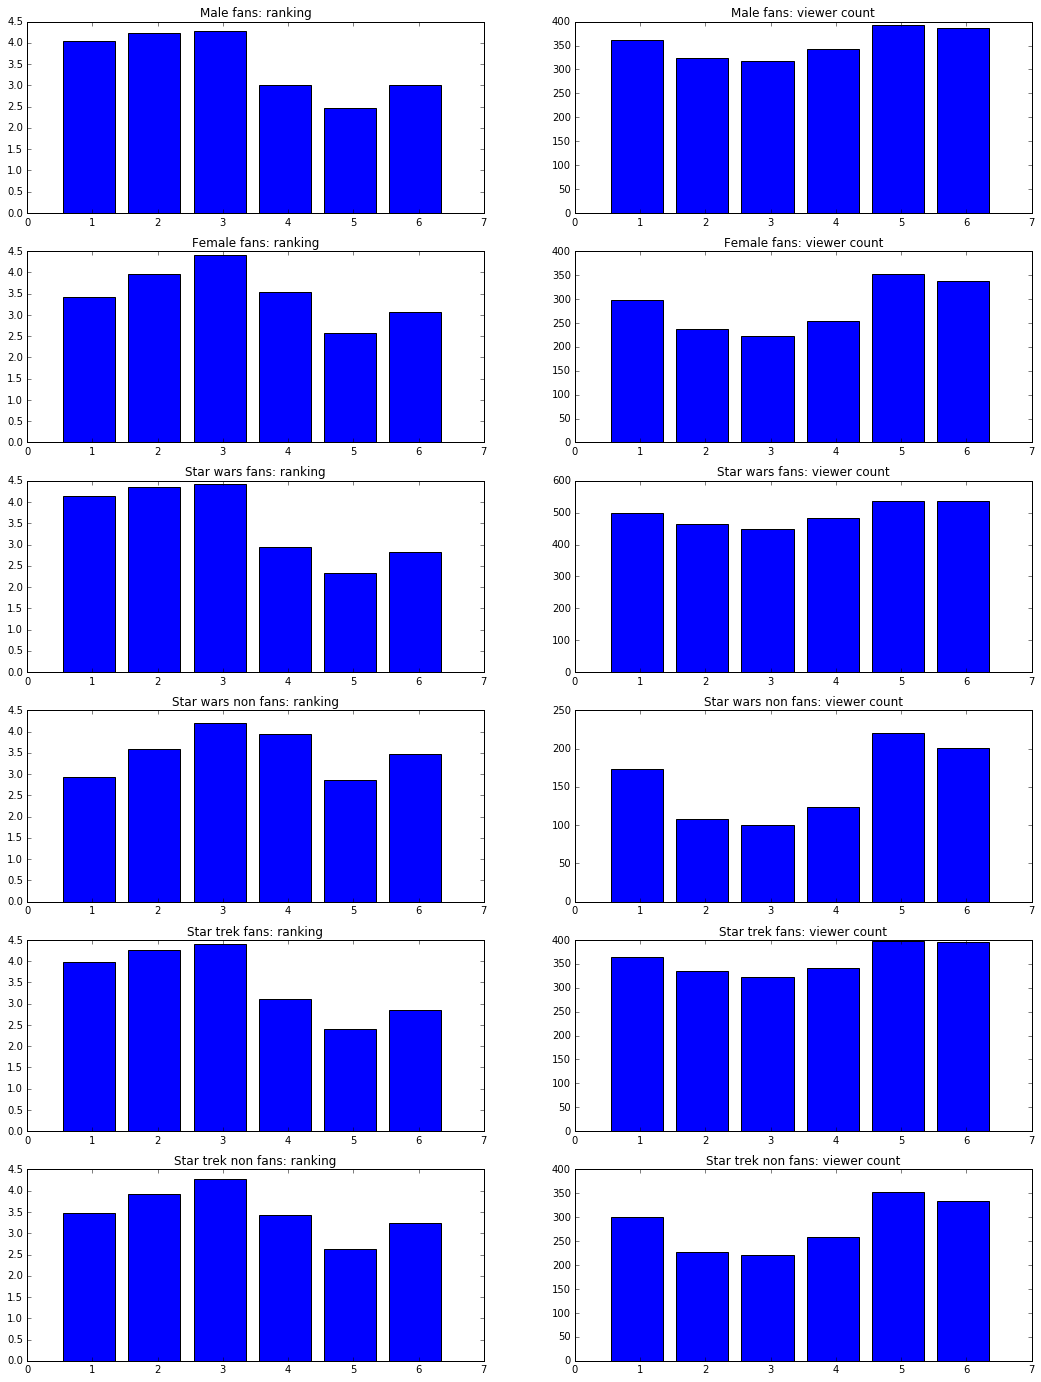

In [24]:
fig = plt.figure(figsize = (18,24))

ax = fig.add_subplot(6,2,1)
ax.bar([i - 0.45 for i in range(1,7)], males[star_wars.columns[9:15]].mean())
ax.set_title('Male fans: ranking')
ax = fig.add_subplot(6,2,2)
ax.bar([i - 0.45 for i in range(1,7)], males[star_wars.columns[3:9]].sum())
ax.set_title('Male fans: viewer count')

ax = fig.add_subplot(6,2,3)
ax.bar([i - 0.45 for i in range(1,7)], females[star_wars.columns[9:15]].mean())
ax.set_title('Female fans: ranking')
ax = fig.add_subplot(6,2,4)
ax.bar([i - 0.45 for i in range(1,7)], females[star_wars.columns[3:9]].sum())
ax.set_title('Female fans: viewer count')

ax = fig.add_subplot(6,2,5)
ax.bar([i - 0.45 for i in range(1,7)], sw_fans[star_wars.columns[9:15]].mean())
ax.set_title('Star wars fans: ranking')
ax = fig.add_subplot(6,2,6)
ax.bar([i - 0.45 for i in range(1,7)], sw_fans[star_wars.columns[3:9]].sum())
ax.set_title('Star wars fans: viewer count')

ax = fig.add_subplot(6,2,7)
ax.bar([i - 0.45 for i in range(1,7)], sw_non_fans[star_wars.columns[9:15]].mean())
ax.set_title('Star wars non fans: ranking')
ax = fig.add_subplot(6,2,8)
ax.bar([i - 0.45 for i in range(1,7)], sw_non_fans[star_wars.columns[3:9]].sum())
ax.set_title('Star wars non fans: viewer count')

ax = fig.add_subplot(6,2,9)
ax.bar([i - 0.45 for i in range(1,7)], st_fans[star_wars.columns[9:15]].mean())
ax.set_title('Star trek fans: ranking')
ax = fig.add_subplot(6,2,10)
ax.bar([i - 0.45 for i in range(1,7)], st_fans[star_wars.columns[3:9]].sum())
ax.set_title('Star trek fans: viewer count')

ax = fig.add_subplot(6,2,11)
ax.bar([i - 0.45 for i in range(1,7)], st_non_fans[star_wars.columns[9:15]].mean())
ax.set_title('Star trek non fans: ranking')
ax = fig.add_subplot(6,2,12)
ax.bar([i - 0.45 for i in range(1,7)], st_non_fans[star_wars.columns[3:9]].sum())
ax.set_title('Star trek non fans: viewer count')


Males have higher viewer ship of episode 1-3 but like it much less than females
Viewers who are not fans of star wars rank the first two new episodes higher than the old episodes which is completely opposite the general preference.
There seems no visible impact of being a star trek fan on the ranking